<center><font size="+2">Introduction to Programming and</font></center>
<center><font size="+2">Data Processing in Python 2020/2021</font></center>
<br/>
<center><font size="+1">Core course, PhD program in Computer Science</font></center>
<center><font size="+1">GSSI Gran Sasso Science Institute, L'Aquila, Italy</font></center><br/>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+1"><a href="https://www.linkedin.com/in/daniele-licari">Daniele Licari</a> &nbsp; d.licari@santannapisa.it</font></center>
<center><font size="+1">
    &nbsp;&nbsp;
    <a href="https://www.santannapisa.it/en/andrea-vandin">Andrea Vandin</a> &nbsp; a.vandin@santannapisa.it</font></center>

---
---

<center><font size="+2">Part 1</font></center>
<center><font size="+1">Advanced Libraries for data manipulation/visualization</font></center>
<center><font size="+1">Overview of NumPy & Pandas</font></center>

---
---

# Notes and references about Part 1

## The role of Part 1

* We assume that you
  * are able to program _well_
  * know how to use the built-in Python data structures and functionalities.
* In this part of the course we will give an overview of advanced Python libraries for data processing.
  * You can see this notebook as a first place to look at when you need to use such libraries.
  * It also contains examples and references to further material
* In the second part of the course you will be using these libraries on a concrete case study on data analysis/machine learning
  * Breast cancer diagnosis

## What is Part 1 about

This notebook is based on Chapter 4 of the following book:
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/wesm/pydata-book)
* Some pictures have been taken from these sources

In particular, this notebook will introduce the Python libraries (_packages_):
* [NumPy](https://numpy.org/): 
   * scientific computing
* [Pandas](https://pandas.pydata.org/): 
   * working with structured data (CSV, Spreadsheets, Databases)
   * creating plots

> Note: in this notebook we will often refer interchangeably to _arrays_, _NumPy arrays_ or just _ndarrays_. 
<br/>
> You can think of __arrays as lists with better performances__ for numerical computing

# NumPy
NumPy, short for Numerical Python, is the Python package for scientific computing
<br/>
It provides:
* An efficient implementation for list-like multidimensional data structures named __NumPy arrays__ or __ndarray__
  * including functions for performing
    * element-wise computations on arrays 
    * mathematical operations between arrays
* Tools for reading/writing datasets from/to disk and arrays
* Linear algebra operations, Fourier transform, and random number generation
* 1-line plotting functionalities
* Tools for integrating C, C++, and Fortran code with Python
  * Useful to use legacy code
  * Useful to use very efficient and established libraries for scientifical computation


For data coming from numerical experiments (or from noisy measurements) 
* NumPy arrays are a more efficient way of storing and manipulating data than the other built-in Python data structures.

## Install and import the NumPy module
The first time you run this notebook you might have to install Pandas using the following script:

In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install --upgrade pip

The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [ ]:
import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt

* This means that when you see `np.arange`, we refer to `numpy.arange`, the `arange` function in NumPy.

## Main features: Arrays, Vectorized Computation, Broadcast

Numpy provides:
* __ndarray__, a multidimensional array providing vectorized arithmetic operations and broadcasting capabilities
   * Vectorized arithmetic operations: 
     - Operations among arrays are done iterating over the elements of the arrays at C level rather than at Python level, obtaining better performances. 
     - The syntax is more concise
   * [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html): 
     - In certain cases, operations on arrays can be done even if they do not have same dimensions. Pyhton tries to guess what to do
     - E.g., if you multiply an array by a constant, each entry of the arrays is multiplied by the constant
       - the constant is `broadcasted` on each entry of the array
     - No data is 'needlessly' copied, and the _iterations to broadcast_  are done at C level, obtaining better performances
* Standard mathematical functions for applying operations on entire arrays without having to write loops
  - Again, these guarantee C-level performances

Let's create a ndarray and a built-in Python list, each with 5mln elements.

In [6]:
import numpy as np
np_arr = np.arange(5000000) #5 mln
py_list = list(range(5000000)) #5 mln

print('np_arr has type',type(np_arr))
print('py_list has type',type(py_list))

np_arr has type <class 'numpy.ndarray'>
py_list has type <class 'list'>


**Performance comparison among  Numpy ndarrays and Python lists**
* Let's compute the square value of each element in the array/list

In [2]:
print("Test NumPy Array")
%time np_arr = np_arr ** 2

print("\nTest Python list comprehension")
%time py_list = [x ** 2 for x in py_list]

print("\nTest Python list iteration")
%time for i in range(len(py_list)): py_list[i]=py_list[i]**2

print("\nTests completed")

Test NumPy Array
CPU times: user 10.5 ms, sys: 13.8 ms, total: 24.3 ms
Wall time: 25 ms

Test Python list comprehension
CPU times: user 1.72 s, sys: 88.6 ms, total: 1.81 s
Wall time: 1.86 s

Test Python list iteration
CPU times: user 2.74 s, sys: 52.6 ms, total: 2.79 s
Wall time: 3.26 s

Tests completed


## The NumPy ndarray: A Multidimensional Array

### What is an ndarray?

NumPy arrays are named **nd**array because they are **n**-**d**imensional arrays
* they have been designed for storing large data sets

In [3]:
import numpy as np
# Generate a 2x3 matrix with random data
data = np.random.randn(2, 3)
data

array([[ 0.71697636, -1.33198358, -0.38554134],
       [ 1.22579137, -1.0956413 , -0.69399477]])

Arrays enable you to perform
mathematical operations on each of their elements 
* using a syntax similar to the equivalent operations between (scalar) numbers

Below we 
* multiply by 10 each value in `data`
* double each value in `data`

In [4]:
print('data * 10 = \n', data * 10)
print('data + data =\n',  data + data)

data * 10 = 
 [[  7.16976357 -13.31983578  -3.85541343]
 [ 12.25791375 -10.956413    -6.93994771]]
data + data =
 [[ 1.43395271 -2.66396716 -0.77108269]
 [ 2.45158275 -2.1912826  -1.38798954]]


A difference between Python lists and arrays
* lists can contain elements of **different type**
* arrays have to contain only elements of **same type**

Every array has 
* a`shape`, a tuple indicating the size of each dimension, 
  * `data.shape` is `(2,3)` because it has dimension 2x3
* a `dtype`, an object describing the type of the data in the array
  * `data.dtype` is `float64` because it contains floating point numbers (reals)
  *  Note that `float64` is a [data type defined in NumPy](https://numpy.org/doc/stable/user/basics.types.html)

In [7]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays
The easiest way to create an array is to use the `array` function. 
* This will produce a new array containing the passed data

In [8]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[6.  7.5 8.  0.  1. ]
(5,)
float64


List of lists 
* e.g. representing a matrix
* can be converted into a multidimensional array if internal lists have same length:

In [10]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
print('data2\n',data2)
arr2 = np.array(data2)
print('arr2\n',arr2)
print(arr2.shape)
print(arr2.dtype)

data2
 [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2
 [[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int64


Further functions for creating new arrays:
* `zeros` and `ones` create arrays of 0’s or 1’s, respectively, with a given length or shape.
* To create a higher dimensional array with these methods, pass a tuple for the shape:

In [11]:
print('np.zeros(10) =', np.zeros(10))
print('np.ones((3, 6)) =\n', np.ones((3, 6)))

np.zeros(10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
np.ones((3, 6)) =
 [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


`arange` is an array-valued version of the built-in Python `range` function:
* It allows to represent an open interval [start,stop,step)
    - where only stop is mandatory.
* Beware: 
  - `range` is an iterator that creates elements on demand
  - `arange` creates an array

In [14]:
print(np.arange(15))
print(type(np.arange(15)))

print(range(15))
print(type(range(15)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
<class 'numpy.ndarray'>
range(0, 15)
<class 'range'>


### Data Types for ndarrays
The names of the numerical dtypes follow this convention: 
* A type name, like `float` or `int`, followed by the number of bits used to represent an element of this type.
* The higher is this number of bits, 
  * the higher precision you can use to store your data (GOOD)
  * the more memory is required to store your data (BAD)

For example, 
* a double-precision floating point value takes 64 bits (`float64`)
* an integer might take 32 (`int32`) or 64 bits (`int64`)
  * in the latter case being able to represent a larger interval of integers, but using up more space

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

You can explicitly convert or cast an array from one dtype to another using ndarray’s `astype` method
* This will create a copy of the original array, where elements have the new type

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
print('Before',arr.dtype)
float_arr = arr.astype(np.float64)
print('After casting',float_arr.dtype)

If I cast some floating point numbers to be of integer dtype, the decimal part will be truncated:

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)

### Vectorized Arithmetics with NumPy Arrays
Once you have values in an array
* you can easily apply operations on each array element 
  * Arithmetic operations between equal-size arrays are applied element-wise
  * Arithmetic operations between an array and a scalar (a number) are as you would expect
    * the operation is applied between each array element and the scalar
    * the scalar is said to be _broadcasted_ to all the array elements
* similarly to list comprehensions, this does not require loops,
  * Note: vectorized arithmetics is more efficient than the corresponding list comprehension operation


In [ ]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
print('a = \n',a, '\n')
print('a * a = \n', a * a, '\n')
print('a - a = \n', a - a, '\n')
print('1 / a = \n', 1 / a, '\n')
print('a*0.5  \n=', a*0.5, '\n')
print('a**0.5  \n=', a**0.5, '\n')

Note that we are not computing the product of 2 matrices. We are just multpliying their elements element-wise

### Basic Indexing and Slicing

One-dimensional arrays are simple
* As mentioned, they are essentially Python lists with better performances and some extra functions

In [ ]:
arr = np.arange(10)
print('arr',arr)
print('arr[5]',arr[5])
print('arr[5:8]',arr[5:8])
arr[5:8] = 12
print('After arr[5:8] = 12',arr)

Note: 
* if you assign a scalar value to a __slice__ (a selection of some elements in an array)
  * as in `arr[5:8] = 12`
* then the value is propagated (or again _broadcasted_) to each selected element 

An important first distinction from lists is **that array slices are views on the original array**.
* The __data in a slice is not copied__
  * this is more efficient
  * and any modifications to the view will be reflected in the source array

In [ ]:
print('source array', arr)
arr_slice = arr[5:8]
print('slice array', arr_slice)

In [ ]:
arr_slice[1] = 12345
print('source array (after arr_slice[1] = 12345) : ', arr)

If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array; 
* `arr2 = arr[5:8].copy()`

With higher dimensional arrays, you have many more options. 
* A two-dimensional array is actually an array of arrays
  * Each entry of the _outer_ array contains an _inner_ array

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

As for multidimensional lists, you can access single elements of inner arrays using more `[]`
* `arr2d[0][2]` is `3`, the third element (index `2`) of the first inner array (index `0`)
* Alternatively, you can do `arr2d[0,2]`

In [ ]:
print(arr2d[0][2])
print(arr2d[0, 2])

**See figure below for an illustration of indexing on a 2D array** <br />
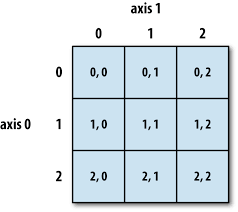

This is an example for 2-dimensional arrays
* It works the same also for more dimensions

#### Indexing and slices higher-dimensional arrays

Higher dimensional arrays can be indexed and sliced in several ways

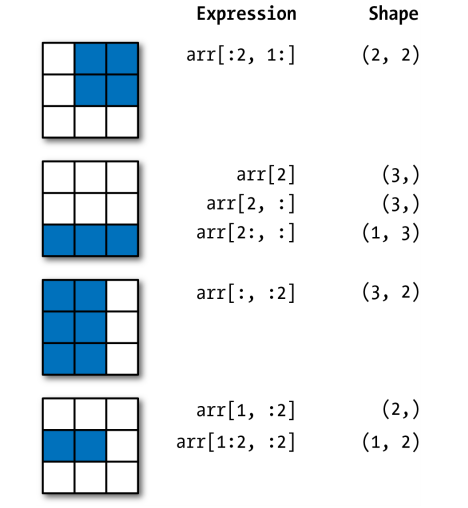

In [ ]:
print(arr2d)
print()
print(arr2d[:2])

We have sliced it along axis 0, the first axis (the rows). 
* A slice, therefore, selects a range of elements along an axis. 
* You can pass multiple slices just like you can pass multiple indexes

In [ ]:
arr2d[:2, 1:]

In [ ]:
arr2d[:2, 1:] = 0 #  assigning to a slice expression assigns to the whole selection
arr2d

We can also use a Boolean expression to select elements in an array
* the ones satisfying the Boolean expression

In [ ]:
data = np.random.randn(7, 4)
print('Data\n',data)
data2=data[ data > 0]
print('Data2\n',data2)

## Mathematical and Statistical Methods
Arrays have a number of methods for 
* computing mathematical functions/statistics 
  * on the entire array 
  * on part of the array

### Reshaping an array

Arrays have a convenient method `reshape` to 
* change their dimensions without modifying the data
* Remember: we compute a view. 
  * no data is actually copied
  * any change to the view is observed also in the orginal data

For example, we can transform
* a 1-dimensional array with 15 entries
* into a 2-dimensional 3x5 array (a matrix)

In [ ]:
arr = np.arange(15)
print("1-dimensional array arr\n",arr)
m=arr.reshape((3, 5))
print("2-dimensional matrix m\n",m)

print()
#m is a view!
m[0,0]=100
print("1-dimensional array arr after modifiyng the view m\n",arr)
print("2-dimensional matrix m after modifiyng the view m\n",m)

### Transposing Arrays
Arrays have the transpose method and also the special T attribute
* This is just a special reshape
* we compute a view - no actual copy

In [ ]:
arr = np.arange(15)
m = arr.reshape(3,5)
print("Matrix m\n",m)
print()
print("Transposed matrix using T\n",m.T)
print()
print("Transposed matrix transpose()\n",m.transpose())

### Matrix product
If you want to [multply two matrices](https://en.wikipedia.org/wiki/Matrix_multiplication) you can use the `dot` function
* not just multiplying element-wise their elements

In [ ]:
m1 = np.arange(4).reshape(2,2)
m2 = (np.arange(4)+4).reshape(2,2)
#np.dot(m.T,m)
print(m1)
print(m2)
np.dot(m1,m2)

You can also multiplty a matrix by its transpose as:

In [ ]:
np.dot(m.T,m)

### Square root
_np.sqrt()_ computes the square root of each element. Equivalent to m ** 0.5

In [ ]:
 np.sqrt(m1)

### Aggregations
Aggregations (often called reductions) 
* like sum, mean, and standard deviation std of all elements in the matrix/array 
8 can be computed by using the corresponding array method

In [ ]:
print('matrix\n',m)
print('mean',m.mean())
print('sum',m.sum())
print('standard deviation',m.std())

print()
print('array\n',arr)
print('mean',arr.mean())
print('sum',arr.sum())
print('standard deviation',arr.std())

Functions like `sum`  and `mean`
* can be computed for each dimension rather than cumulatively 
* we do this specifying the `axis` (the dimension) over which we want to iterate

For example, using 
* `axis=0` we compute the sum/mean/std for each column of M
* `axis=1` we compute the sum/mean/std for each row of M

In [ ]:
print('matrix\n',m)
print()

print('sum of each column\n',m.sum(axis=0))
print('mean of each column\n',m.mean(axis=0))
print('standard deviation of each column\n',m.std(axis=0))
print()

print('sum of each row\n',m.sum(axis=1))
print('mean of each row\n',m.mean(axis=1))
print('standard deviation of each row\n',m.std(axis=1))

### Sorting
Similarly to lists, 
* arrays can be sorted using the `sort()` method

In [ ]:
arr = np.random.randn(8)
arr

In [ ]:
arr.sort()
arr

Multidimensional arrays are sorted by iteratively sorting each dimentsion. 
E.g. in matrices we 
* Sort the elements within each row
* We sort the rows using the lexicographical order

In [ ]:
arr2d = np.random.randn(5, 3)
arr2d

In [ ]:
arr2d.sort()
arr2d

But we can also sort single dimensions

In [ ]:
arr2d = np.random.randn(5, 3)
print(arr2d)
print()
arr2d.sort(1)
print(arr2d)

### Unique
NumPy has some basic set operations for one-dimensional ndarrays. 
* The most common one is `np.unique()` 
  * returns the sorted unique values in an array

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

# pure Python alternative:
# sorted(set(names))

# Pandas
Pandas is another popular Python package. 
* It is built on top of NumPy (it used data structures based on arrays)

Pandas provides rich data structures and functions designed to 
* make it easy, flexible and efficient working with structured data (CSV files, spreadsheets, databases)

E.g., Pandas allows to easily perform complex data manipulation like 
* _reshape_ and _slice_
* data aggregations 
* data selection

## Install and import the Pandas module

The first time you run this notebook you might have to install Pandas using the following script:

In [ ]:
import sys
!{sys.executable} -m pip install pandas

The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [ ]:
#import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt

## Series

A Series is a one-dimensional list-like object containing 
* an ndarray containing the actual data
* an associated ndarray of labels with one label (or index) per data element

Intuitively, you can see a Series as 
* a dictionary 
* or, in its simplest form, as a 1-dimensional array/list

The simplest form of Series consists of 
* an array of data, 
* an implicit array of labels containing the position of each element in the main array

In [ ]:
obj = pd.Series([4, 7, -5, 3])
obj

We note that 
* The string representation of a Series shows the index on the left and the values on the right
  * Obtained redefining the method `__str__` of the class Series, as you know from the previous class


Since we did not specify an index for the data, 
* a default array of labels containing integers from 0 to N - 1 is created.
  * each element is labeled with its own position in the array

If you are interested only in one of the two arrays, just use

In [ ]:
print('Series index: ',obj.index)
print('Series values: ',obj.values)

Let's now create a Series whose entries are labelled by characters.

In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

### Indexing, selection, and filtering

Similarly to Python dictionaries, 
* you can use values in the index to select values in the main array

In [ ]:
print("obj2['d'] = ",obj2['d'])

obj2['d'] = 6
print("obj2['d']  (after obj2['d'] = 6) =  ",obj2['d'])
      
print("obj2[['c', 'a', 'd']] = \n",obj2[['c', 'a', 'd']])

Indexes are preserved by NumPy array operations like
* filtering with a boolean array, scalar multiplication, application of math functions

In [ ]:
print("obj2\n",obj2)
print()
print("NumPy operation obj2[obj2 > 0] \n",obj2[obj2 > 0])
print()
print("NumPy operation obj2 * 2 \n",obj2 * 2)
print()
print("NumPy operation np.exp(obj2) \n",np.exp(obj2))

You create a Series using a dict and a list as index
* the list contains the keys of interest from the dict

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 

We note that
* 3 values found in sdata were placed in the appropriate locations, 
* but since no value for `'California'` was found, it got a `NaN` (not a number) 
  * which is considered in pandas to mark missing/NA/NaN values
  
The `isnull` and `notnull` functions in pandas detect such missing values:

In [ ]:
pd.isnull(obj4) 

In [ ]:
pd.notnull(obj4) 

E.g., if you want to use only the non-null values you do:

In [ ]:
obj4[pd.notnull(obj4)]

## DataFrame
* A Series can be seen as a table with 1 column
* A DataFrame is a proper table with more columns
  * A series is just a simpler version of a dataframe
  * A dataframe is a series with 'more main arrays' (one per column)
  * DataFrames are the most important objects in pandas

### Creating DataFrame objects

The most common way to build a dataframe is by 
* using a dict containing lists or arrays of same length
  * each key/label becomes a column
    * if you specify a subset of key/labels, then only the corresponding column will be added
    * if you pass a column that isn’t contained in data, it will get NA values
  * each list/array element is a value for that column

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [ ]:
frame = pd.DataFrame(data,columns=['state','pop','nonExistingColumn'])
frame

In [ ]:
frame = pd.DataFrame(data)
frame

We see above that the DataFrame also has an index/labels array
* the first element in each row
  * in this case we have the default array of labels show
  * but specific ones can be given explicitly

In [ ]:
frame1 = pd.DataFrame(data, index = ['a','b','c','d','e','f'] )
frame1

A column of a DataFrame can be retrieved as a Series 
* by dict-like notation 
* or by attribute:

In [ ]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five','six'])
frame2

In [ ]:
#Select single column or sequence of columns from the DataFrame
frame2['state'] # by dict-like notation 

In [ ]:
frame2.state # by attribute

### Updating DataFrame objects

Values is a dataframe column can be modified by assignment. 
* If we assign a single value to a column, then the value is broadcasted to the whole column
* E.g., the empty `debt` column can be initialized to 16.5 as:

In [ ]:
frame2['debt'] = 16.5
frame2

When assigning lists or arrays to a column, the value’s length must match the length
of the DataFrame. 

In [ ]:
frame2['debt'] = np.arange(6.)
frame2

Creating and deleting columns
* Assigning a column that doesn’t exist will create a new column. 
* The del keyword will delete columns as with a dict

In [ ]:
frame2['eastern'] =  (frame2.state == 'Ohio')
frame2

In [ ]:
del frame2['eastern']
frame2

We have just seen how to __delete columns__

In order to __delete rows__ 
* you just use the `drop` method
* BEWARE: __this will create a proper copy of the dataframe: a new object__

In [ ]:
frame100 = frame2.drop(['five'])
frame100

In [ ]:
frame100['year']=100
frame100

In [ ]:
frame2

Instead
* The column returned when indexing a DataFrame is a view on the underlying data
*  Thus, any modification to the Series will be reflected in the DataFrame.
   * The column can be explicitly copied using the Series’s copy method.

If you create a dataframe using a 2-levels nested dictionary
* The keys of the outer dictionary will be used for the column names
* The keys of the inner dictionary will be used for the index names

In [ ]:
inner_dict1 ={           2001: 2.4, 2002: 2.9}
inner_dict2 ={2000: 1.5, 2001: 1.7, 2002: 3.6}

outer_dict = {'Nevada': inner_dict1, 'Ohio': inner_dict2}
frame3 = pd.DataFrame(outer_dict)
frame3

Similarly to multi-dimensional arrays, 
* you can transpose the result:

In [ ]:
frame3.T

You can also choose which keys of the inner dict (i.e. which indexes) to use
* we are not using 2001
* we are using a non-existing index 2003

In [ ]:
pd.DataFrame(outer_dict, index=[2001, 2002, 2003])

Like Series, the values attribute returns the data contained in the DataFrame as a 2D
ndarray

In [ ]:
frame3.values

### Indexing, selection, and filtering


Indexing into a DataFrame is for retrieving one or more columns:

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data['two'] #retrieving one column

In [ ]:
data[['three', 'one']] #retrieving two columns

However, if you select by slicing or Boolean expression, it is interpreted as a selection on __rows__

In [ ]:
data[:2] #rows by slicing 

In [ ]:
data[data['three'] > 5]  #rows by a boolean array

#### Easier/more intuitive selection using loc and iloc

The `iloc` field of dataframes allows to select subsets or rows and columns using NumPy-like notation
* The iloc indexer for Pandas Dataframe is used for integer-location based indexing / selection by position.
* `data.iloc[row selection, column selection]`

In [ ]:
data

In [ ]:
data.iloc[1]   # second row

In [ ]:
data.iloc[-1]  # last row

In [ ]:
data.iloc[:,1] # first column

In [ ]:
# Multiple row and column selections using iloc and DataFrame
data.iloc[:, 0:2] # first two columns of data frame with all rows

In [ ]:
data.iloc[[1, 2], [3, 0, 1]] # 2nd 3rd row + 4th 1st 2nd columns.

The Pandas `loc` indexer works the same
* but you can use column/index names
    a.) Selecting rows by label/index
    b.) Selecting rows with a boolean / conditional lookup
The loc indexer is used with the same syntax as iloc: data.loc[row selection, column selection] .

In [ ]:
print(data.loc[['Colorado','Ohio']]) #List of labels index.
print()
print(data.loc[:,'one']) # first column of data frame
print()

# Multiple row and column selections using loc and DataFrame
print(data.loc[['Colorado','Ohio'], ['one','four']])  # 'Colorado','Ohio' row + 'one','four'columns.

### Arithmetics and Data Alignment
When summing 2 dataframes, is their sets of indexes is not equal, 
* the resulting dataframe will contain the union of the two indexes, 
* summing only the rows with same index
* while rows with indexes present in only one dataframe will be just copied
* This is known as __data alignment__
  * Intuitively, NA-rows (or 0-rows, see belw) are added to the dataframe to make them have same indexes

In [ ]:
df1 = pd.DataFrame(np.arange(4.).reshape((2, 2)), columns=list('ab'),
                   index=['Texas', 'Colorado'])
df1

In [ ]:
df2 = pd.DataFrame((np.arange(3.)+4).reshape((1, 3)), columns=list('abc'),
                   index=['Texas'])
df2

In [ ]:
df1 + df2

You might want to fill with a defau;t value 
* when a combination 'row,column' is found in at least one dataframe
* 'Colorado,c' remains NA because it does not appear in any dataframe

In [ ]:
df1.add(df2, fill_value=0)

### A digression: lambda functions

**Take material from functions**

### Function application and mapping
NumPy ufuncs (element-wise array methods) work fine with pandas objects:

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

In [ ]:
np.abs(frame)

But you can also apply any function thought for 1d arrays to each column or row.

In [ ]:
f = lambda arr: arr.max()
frame.apply(f)

In [ ]:
frame.apply(f, axis='columns')

Element-wise Python functions can be used, too. 

In [ ]:
times_ten = lambda x: x*10
frame.applymap(times_ten)

In [ ]:
frame['e'].map(times_ten)

### Sorting
To sort
lexicographically by row or column index, use the sort_index method, which returns
a new, sorted object:

In [ ]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

In [ ]:
obj.sort_index()

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['three', 'two','one'],
                     columns=['c', 'a', 'b'])
frame

In [ ]:
frame.sort_index() # sorting by the index

In [ ]:
frame.sort_index(axis=1,ascending=False) #  sorting  by column index  in descending order

### Summarizing and Computing Descriptive Statistics
Series and Dataframes offer methods for computing comming mathematical/statistical methods. 
* Most of these are reductions or summary statistics, 
  * methods that compute
    * For Series: a single value (e.g. sum or mean) 
    * For DataFrames: a Series of values from the rows or columns. 

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

In [ ]:
df.sum(axis='columns')

In [ ]:
df.sum()

Note that NaN are ignored
* `9.25/3 = 3.083333`

In [ ]:
df.mean()

idxmin and idxmax, return 
* the index containing the minimum or maximum values

In [ ]:
df

In [ ]:
df.idxmax()

The method `describe` computes a number of summary statistics in one shot:

In [ ]:
df.describe() #Compute set of summary statistics for Series or each DataFrame column

# Simple application to Italian COVID data - load/manipulate remote CSV file

Using Python and pandas, it is easy to read data from text files

One convenient feature is _type inference_
* You don’t need to specify which columns are numeric, integer, boolean, or string. 
* Handling dates and other custom types requires a bit more effort, though. 

Do you remember the [Italian COVID CSV data used in class 4?](https://htmlpreview.github.io/?https://github.com/andrea-vandin/IntroToPython20192020/blob/master/jupyter/jupyterNotebooks/html/04ControlAndRepetitionStatements.html)
* Let's read one such online CSV file
* and load it into a DataFrame
* __You just need 1 instruction__

In [ ]:
#Load delimited data from a file, URL, or file-like object. Use comma as default delimiter
covid_data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

In [ ]:
covid_data.head()

In [ ]:
covid_data.tail()

In [ ]:
covid_data.info()

In [ ]:
covid_data['data']

In [ ]:
#Get the last day in the CSV file
last_day = covid_data['data'].iloc[-1]
last_day

Using DataFrame’s to_csv method, we can write the data out to a comma-separated file
* Let's create a CSV file containing only the data about the latest day

In [ ]:
print(covid_data.data == last_day) # Evaluates to True for the rows that satisfy this guard
cov_regions_last_day = covid_data[covid_data.data == last_day] # Get all the rows that satisfy the guard above
cov_regions_last_day

In [ ]:
cov_regions_last_day.to_csv('covid_lastday.csv')

# Simple application to Yahoo! Finance stock prices - %change, correlation, covariance
Let’s consider some DataFrames of stock prices obtained from
Yahoo! Finance:

In [ ]:
# install Yahoo! Finance market data downloader for Pandas
import sys 
!{sys.executable} -m pip install pandas_datareader
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install Jinja2 # Helps style a DataFrame or Series according to the data with HTML and CSS.


import pandas_datareader.data as web

# Visualizzation libs
# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend

In [ ]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
all_data['AAPL']

In [ ]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
price.head()

In [ ]:
price.tail()

In [ ]:
# plotting price dataframe. 
price.plot(figsize=(15,5))

Now we compute the percent changes of the prices
* % change from previous value

In [ ]:
returns = price.pct_change() # Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.
returns.tail()

In [ ]:
returns.plot(figsize=(15,5))

DataFrames offer two methods for comptuing 
* the correlation among the elements in the DataFrame (`corr`)
* the covariance matrxi of the DataFrame (`cov`)

In [ ]:
returns.corr()

In [ ]:

returns.corr().style.background_gradient(cmap='Reds')

In [ ]:
returns.cov()

# More complex application to Italian COVID data - Advanced Plotting with pandas 
Pandas offers a number of plotting methods for DataFrame objects

The Italian Civil Protection Department publishes everyday [data on the status of the COVID-19 epidemy in Italy](https://github.com/pcm-dpc/COVID-19)

The repository contains
- ‘dati-andamento-nazionale’ (data relating to the national trend of SARS-CoV-2 spread), 
- ‘dati-regioni’ (data relating to the regional trend of SARS-CoV-2 spread),
- ‘dati-province’ (data relating to the provincial trend of SARS-CoV-2 spread) 


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Line Plots
Series and DataFrame each have a plot method for making many different types of plots
* By default, they make line plots 

In [ ]:
# load data relating to the national trend of SARS-CoV-2 spread on Pandas DataFrame
url_dpc_nazionale = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')

covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail(2)

In [ ]:
from datetime import datetime

#Let's get the data of interest ('totale_positivi','dimessi_guariti','deceduti')
covid_italy_filter = covid_italy[['totale_positivi','dimessi_guariti','deceduti' ]]

covid_italy_filter

In [ ]:
# We now create the plot
covid_italy_filter.plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 

# and add annotations
annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
               datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
               datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
               datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
for d,a in annotations.items():
    plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
    plt.axvline(d, color='k', linestyle='--')   
    
plt.show()

Eliminiamo un certo numero di righe cambiando asse delle y

## Bar Plots
Making bar plots instead of line plots is as simple as passing 
* `kind='bar'` (for vertical bars) or 
* `kind='barh'` (for horizontal bars).

In [ ]:
# load data relating to the regional trend of SARS-CoV-2 spread
url_dpc_regioni = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
covid_regions = pd.read_csv(url_dpc_regioni)
covid_regions.index = pd.to_datetime(covid_regions.data)
covid_regions = covid_regions.rename(columns={'denominazione_regione': 'regione'})

# get last day data relating to the regional trend of SARS-CoV-2 spread
cov_regions_last_day = covid_regions[covid_regions.data ==  covid_regions.data.iloc[-1]] # get last day data
cov_regions_last_day.index = cov_regions_last_day.regione

#drop some unnecessary columns
#cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note_it","note_en"], axis = 1)
cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note"], axis = 1)

#Let's get the data of interest (Deceduti vs Positivi) and plot them
title = f" Deceduti vs Positivi updated at {covid_regions.index[-1].strftime('%D')}"
#Here we are using 'bar!'
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']].plot(kind='bar', figsize =(20,7),grid=True,title=title)

plt.show()

### Stacked bar plots
Stacked bar plots are created from a DataFrame by passing `stacked=True`, resulting in
the value in each row being stacked together

In [ ]:
#Let's get the data of interest ('terapia_intensiva','totale_ospedalizzati') and plot them on stacked bar
title = f"Positivi updated at {covid_regions.index[-1].strftime('%D')}"
cov_regions_last_day[['terapia_intensiva','totale_ospedalizzati']].plot(kind='bar', stacked=True, figsize =(20,7),grid=True,title=title)

plt.show()

## Scatter Matrix 
In exploratory data analysis it is helpful to look at how pairs of variables relate to each other
* we are interested in _plots relating pairs of variables_
* this is known as a _pairs plot_ or _scatter plot matrix_. 

Making such a plot from scratch is a bit of work. 
* Luckily pandas has a `scatter_matrix` function for creating one from a DataFrame. 
* It also supports placing histograms or density plots of each variable along the diagonal.

In [ ]:
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail()

In [ ]:
#drop unnecessary columns
#covid_italy.drop(columns=["stato","note"], inplace=True)
#covid_italy.drop(columns=["stato","casi_da_sospetto_diagnostico","casi_da_screening","note","ingressi_terapia_intensiva","note_test","note_casi","totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
covid_italy.drop(columns=["note_test","note_casi"], inplace=True)
#covid_italy.drop(columns=["note_test","note_casi","totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)


covid_italy['totale_casi']

In [ ]:
covid_italy['terapia_intensiva']

In [ ]:
#covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
# covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
# #covid_italy.drop(columns=["note_test","note_casi","totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
# covid_italy.drop(columns=["note_test","note_casi","totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)


pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()

In [ ]:
covid_italy.drop(columns=["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)

pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()